## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combines the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

C:\Users\jabuk\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Checks the total number of mice in rawdata
len(mouse_study_df["Mouse ID"].unique())

249

In [3]:
# Finds the mice with duplicated Mouse ID and Timepoint 
id_duplicates = mouse_study_df.duplicated(["Mouse ID", "Timepoint"], keep=False)

# Filters for duplicated mouse ID
duplicate_mice = mouse_study_df.loc[id_duplicates, :]

In [4]:
#Finds the index location of duplicate Mice ID
dup_miceID = duplicate_mice["Mouse ID"].unique()
dup_miceID[0]

'g989'

In [5]:
# Excludes the duplicate mouse from the data using the Mouse ID index location above
duplicate_mouseID = mouse_study_df['Mouse ID']!= dup_miceID[0]

#Creates a clean df without any duplicates
clean_data = mouse_study_df.loc[duplicate_mouseID, :]

In [6]:
# Checks the number of mice in the clean df to make sure duplicate was deleted
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics of the Tumor Volume for each Drug Regimen
#### Table of mean, median, variance, standard deviation and SEM

In [7]:
#Creates a MEAN series grouped by Drug Regimen
avg_DRgroup = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()

In [8]:
#Creates a MEDIAN series grouped by Drug Regimen
median_DRgroup = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

In [9]:
#Creates VARIANCE series grouped by Drug Regimen
var_DRgroup = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

In [10]:
#Creates a STD DEV series grouped by Drug Regimen
STD_DRgroup = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

In [11]:
#Creates an SEM series grouped by Drug Regimen
SEM_DRgroup = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

In [12]:
# Combines all series created to produce a df with all summary statistics (EASY METHOD)
Tumor_Volume_stats = {
    "Mean": avg_DRgroup, 
    "Median": median_DRgroup,
    "Variance": var_DRgroup,
    "Standard Deviation": STD_DRgroup,
    "SEM": SEM_DRgroup
}

#Creates summary dataframe that includes dictionary of stats
TV_Stats = pd.DataFrame(Tumor_Volume_stats)

In [13]:
#Summary Statistics using groupby function (SHORTER/CLEANER METHOD)
TV_Stats_groupby = clean_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

## Bar Plots (using PANDAS & MATPLOTLIB)

### >> BAR Plotting in PANDAS 

In [14]:
#Shows index locations of each drug regimen
index_DR = clean_data['Drug Regimen'].value_counts().index
index_DR

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object')

In [15]:
#Treatment A = Capomulin
#Filters the number of mice treated by Capomulin per timepoint
treatmentA = clean_data['Drug Regimen']== index_DR[0]
filterA = clean_data.loc[treatmentA, :]
Capomulin = filterA.groupby(["Timepoint"])['Mouse ID'].count()

#NOTE: Capomulin returns the series (cannot be used for plotting)
#Returns an array type values of Capomulin, which is used in .plot
Capomulin_counts = Capomulin.values

In [18]:
#Treatment B = Ramicane
#Filters the number of mice treated by Ramicane per timepoint
treatmentB = clean_data['Drug Regimen']== index_DR[1]
filterB = clean_data.loc[treatmentB, :]
Ramicane = filterB.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Ramicane, which is used in .plot
Ramicane_counts = Ramicane.values

In [19]:
#Treatment C = Ketapril
#Filters the number of mice treated by Ketapril per timepoint
treatmentC = clean_data['Drug Regimen']== index_DR[2]
filterC = clean_data.loc[treatmentC, :]
Ketapril = filterC.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Ramicane, which is used in .plot
Ketapril_counts = Ketapril.values

In [20]:
#Treatment D = Naftisol
#Filters the number of mice treated by Naftisol per timepoint
treatmentD = clean_data['Drug Regimen']== index_DR[3]
filterD = clean_data.loc[treatmentD, :]
Naftisol = filterD.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Naftisol, which is used in .plot
Naftisol_counts = Naftisol.values

In [21]:
#Treatment E = Zoniferol
#Filters the number of mice treated by Zoniferol per timepoint
treatmentE = clean_data['Drug Regimen']== index_DR[4]
filterE = clean_data.loc[treatmentE, :]
Zoniferol = filterE.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Zoniferol, which is used in .plot
Zoniferol_counts = Zoniferol.values

In [23]:
#Treatment F = Stelasyn
#Filters the number of mice treated by Stelasyn per timepoint
treatmentF = clean_data['Drug Regimen']== index_DR[5]
filterF = clean_data.loc[treatmentF, :]
Stelasyn = filterF.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Stelasyn, which is used in .plot
Stelasyn_counts = Stelasyn.values

In [24]:
#Treatment G = Placebo
#Filters the number of mice treated by Placebo per timepoint
treatmentG = clean_data['Drug Regimen']== index_DR[6]
filterG = clean_data.loc[treatmentG, :]
Placebo = filterG.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Placebo, which is used in .plot
Placebo_counts = Placebo.values

In [25]:
#Treatment H = Ceftamin
#Filters the number of mice treated by Ceftamin per timepoint
treatmentH = clean_data['Drug Regimen']== index_DR[7]
filterH = clean_data.loc[treatmentH, :]
Ceftamin = filterH.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Ceftamin, which is used in .plot
Ceftamin_counts = Ceftamin.values

In [26]:
#Treatment I = Infubinol
#Filters the number of mice treated by Infubinol per timepoint
treatmentI = clean_data['Drug Regimen']== index_DR[8]
filterI = clean_data.loc[treatmentI, :]
Infubinol = filterI.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Infubinol, which is used in .plot
Infubinol_counts = Infubinol.values

In [36]:
#Treatment J = Propriva
#Filters the number of mice treated by Propriva per timepoint
treatmentJ = clean_data['Drug Regimen']== index_DR[9]
filterJ = clean_data.loc[treatmentJ, :]
Propriva = filterJ.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Propriva, which is used in .plot
Propriva_counts = Propriva.values
Propriva_counts

array([24, 23, 21, 15, 15, 13, 12,  9,  9,  7], dtype=int64)

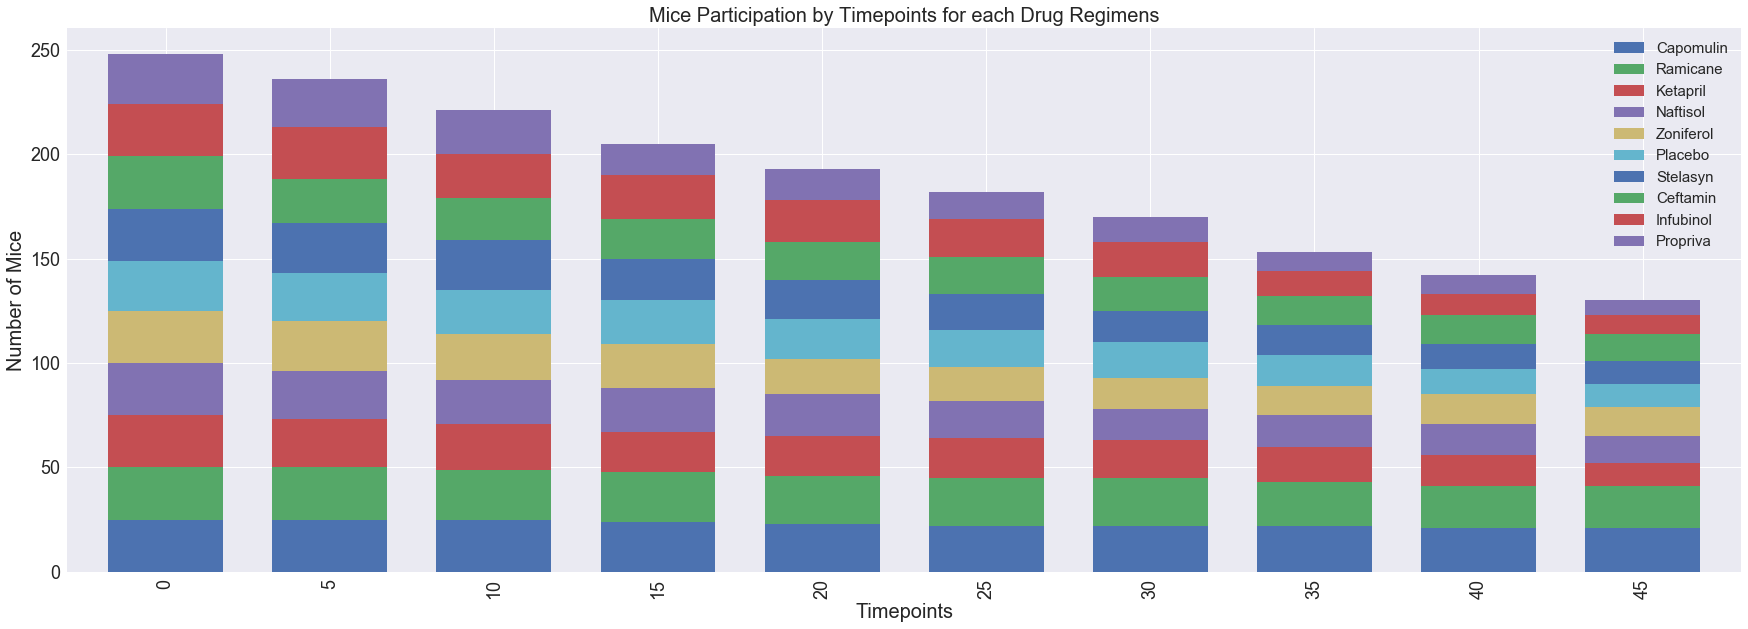

In [35]:
#Set labels for x-axis (STACKED)
labels = ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45']

#Create df
mice_pertimepts_byDR = pd.DataFrame({ 
    'Timepoints': labels, 
    'Capomulin': Capomulin_counts,
    'Ramicane': Ramicane_counts,
    'Ketapril': Ketapril_counts,
    'Naftisol': Naftisol_counts,
    'Zoniferol': Zoniferol_counts,
    'Placebo': Placebo_counts,
    'Stelasyn': Stelasyn_counts,
    'Ceftamin': Ceftamin_counts,
    'Infubinol': Infubinol_counts,
    'Propriva': Propriva_counts    
}) 
#Plot the graph
mice_pertimepts_byDR.plot(kind= 'bar', x='Timepoints', 
                          y=['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol','Placebo', 'Stelasyn', 'Ceftamin','Infubinol', 'Propriva'],
                          width= 0.70, fontsize=18, stacked=True, figsize=(30, 10)) 

#Adds titles, axis labels, and legend with modifications in font sizes (did plt since .plot doesn't fix fontsize)
plt.title('Mice Participation by Timepoints for each Drug Regimens', fontsize=20)
plt.xlabel('Timepoints', fontsize=20)
plt.ylabel('Number of Mice', fontsize=20)
plt.legend(fontsize=15)


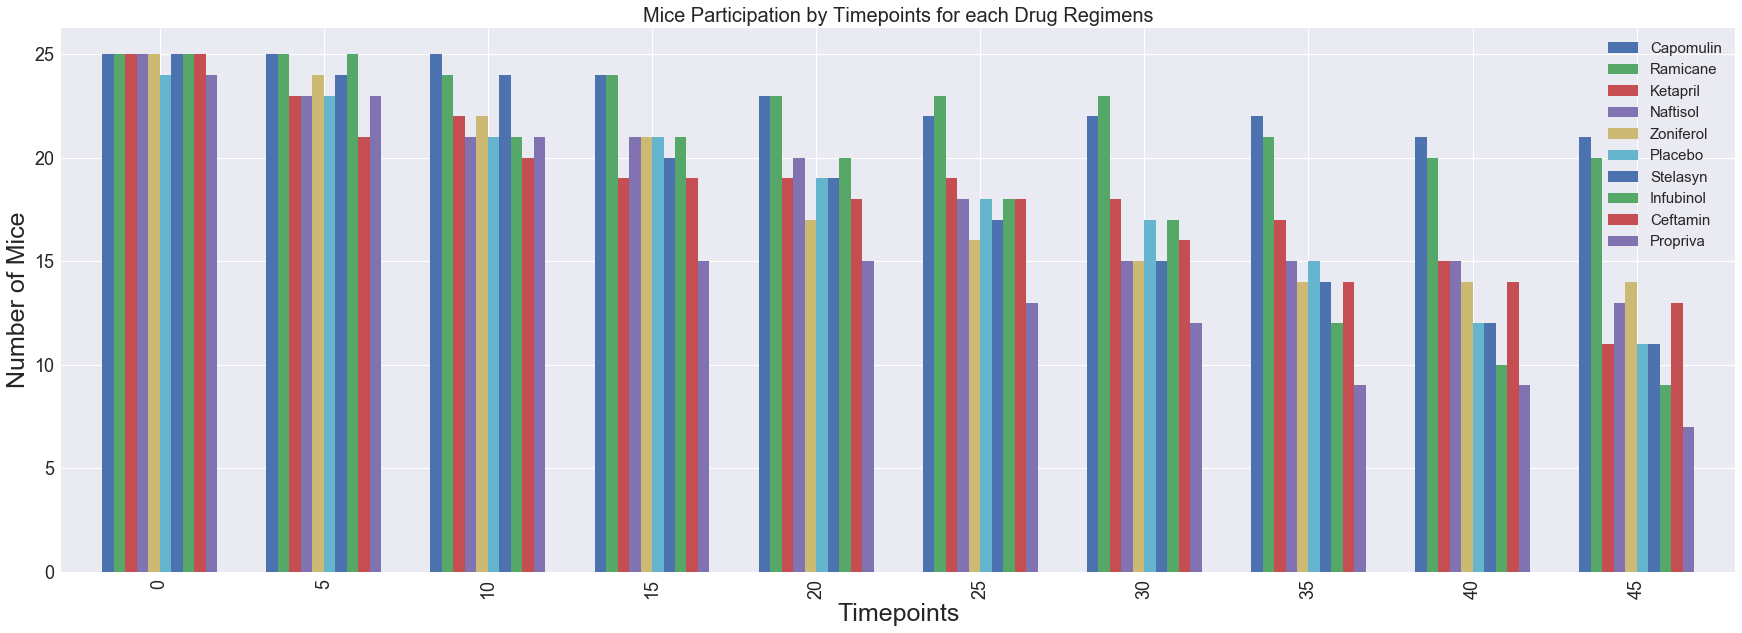

In [48]:
#Plot the graph (UNSTACKED)
mice_pertimepts_byDR.plot(kind= 'bar', x='Timepoints', 
                          y=['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol','Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
                          width= 0.70, fontsize=18, figsize=(30, 10)) 

plt.title('Mice Participation by Timepoints for each Drug Regimens', fontsize=20)
plt.xlabel('Timepoints', fontsize=25)
plt.ylabel('Number of Mice', fontsize=25)
plt.legend(fontsize=15)


### >> BAR Plotting in MATPLOTLIB 

In [49]:
#Returns all unique timepoint values as an array ~ to be used for x-axis labels
time_points = clean_data['Timepoint'].unique()
time_points

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [ ]:
plt.figure(figsize=(30,10))
width_bar = 0.08


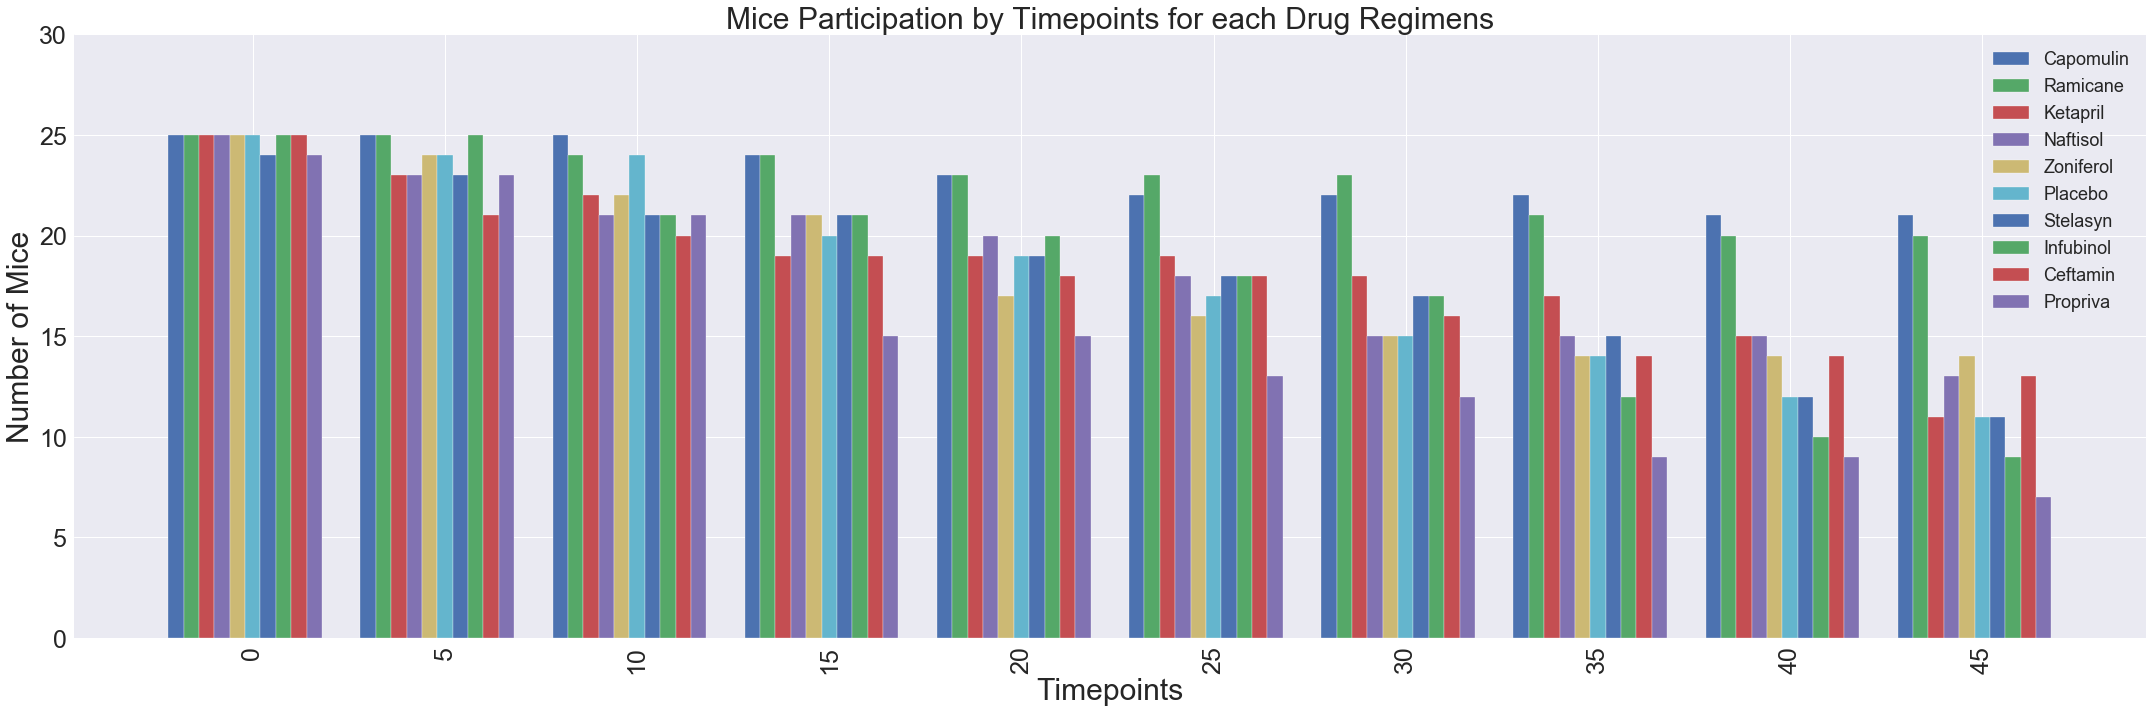

In [30]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using PYPLOT.

plt.figure(figsize=(30,10))
width_bar = 0.08

#loop to position bar graphs
bar1_cap = np.arange(len(time_points)) 
bar2_ram = [i+width_bar for i in bar1_cap]
bar3_ket = [i+width_bar for i in bar2_ram]
bar4_naf = [i+width_bar for i in bar3_ket]
bar5_zon = [i+width_bar for i in bar4_naf]
bar6_pla = [i+width_bar for i in bar5_zon]
bar7_ste = [i+width_bar for i in bar6_pla]
bar8_inf = [i+width_bar for i in bar7_ste]
bar9_cef = [i+width_bar for i in bar8_inf]
bar10_pro = [i+width_bar for i in bar9_cef]

#plotting each bars
plt.bar(bar1_cap, Capomulin_counts, width_bar, edgecolor='white', label="Capomulin")
plt.bar(bar2_ram, Ramicane_counts, width_bar, edgecolor='white', label="Ramicane")
plt.bar(bar3_ket, Ketapril_counts, width_bar, edgecolor='white', label="Ketapril")
plt.bar(bar4_naf, Naftisol_counts, width_bar, edgecolor='white', label="Naftisol")
plt.bar(bar5_zon, Zoniferol_counts, width_bar, edgecolor='white', label="Zoniferol")
plt.bar(bar6_pla, Placebo_counts, width_bar, edgecolor='white', label="Placebo")
plt.bar(bar7_ste, Stelasyn_counts, width_bar, edgecolor='white', label="Stelasyn")
plt.bar(bar8_inf, Infubinol_counts, width_bar, edgecolor='white', label="Infubinol")
plt.bar(bar9_cef, Ceftamin_counts, width_bar, edgecolor='white', label="Ceftamin")
plt.bar(bar10_pro, Propriva_counts, width_bar, edgecolor='white', label="Propriva")

plt.title('Mice Participation by Timepoints for each Drug Regimens', fontsize=30)
plt.xlabel('Timepoints', fontsize=30)
plt.ylabel('Number of Mice', fontsize=30)

#Set tick location to center
tick_locations = [value+0.4 for value in bar1_cap]
plt.xticks(tick_locations, time_points, rotation="vertical", fontsize=25)
plt.yticks(fontsize=25)

plt.ylim(0,30)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

## Pie Plots

In [31]:
gender_group = clean_data.groupby(["Sex"])
gender_group

Text(0, 0.5, '')

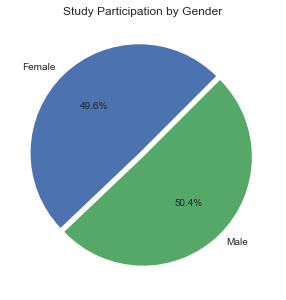

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_count = gender_group['Mouse ID'].nunique()
unique_count

unique_count.plot(kind='pie', title='Study Participation by Gender', autopct='%1.1f%%', figsize=(5, 5), explode= (0.05, 0), startangle=45)
plt.ylabel('')

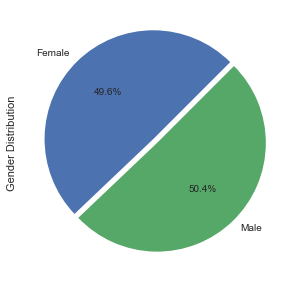

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = gender_group['Mouse ID'].unique()
gender_map = genders.map(len)

explode = (0.05, 0)
plt.figure(figsize=(5, 5))
plt.pie(gender_map, labels=['Female','Male'], explode=explode, autopct="%1.1f%%", startangle=45)
plt.ylabel('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

#### Calculations of IQRs of 4 Top Drug Regimens: Capomulin, Ceftamin, Infubinol and Ramicane

In [6]:
#use later in getting total volume of top 4
treatments_df = clean_data["Drug Regimen"].unique()
treatments_df

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [34]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
best_treatments = treatmentA | treatmentI | treatmentH | treatmentB
bestDR_byTVols = clean_data.loc[best_treatments,
    ["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]
]
bestDR_byTVols

Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)  Weight (g)
0        Ramicane     k403          0           45.000000          16
1        Ramicane     k403          5           38.825898          16
2        Ramicane     k403         10           35.014271          16
3        Ramicane     k403         15           34.223992          16
4        Ramicane     k403         20           32.997729          16
...           ...      ...        ...                 ...         ...
1868    Infubinol     z581         25           54.316407          25
1869    Infubinol     z581         30           56.286750          25
1870    Infubinol     z581         35           58.628399          25
1871    Infubinol     z581         40           60.053740          25
1872    Infubinol     z581         45           62.754451          25

[814 rows x 5 columns]

In [35]:
#for plotting
Top_Drug_Regimens = bestDR_byTVols["Drug Regimen"].unique()
Top_Drug_Regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'], dtype=object)

In [36]:
final_time = bestDR_byTVols.loc[bestDR_byTVols["Timepoint"] == 45, 
                                ["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]
                               ]
final_time

Drug Regimen Mouse ID  Tumor Volume (mm3)  Weight (g)
9        Ramicane     k403           22.050126          16
19      Capomulin     s185           23.343598          17
29      Capomulin     x401           28.484033          15
39      Capomulin     m601           28.430964          17
49       Ramicane     g791           29.128472          16
...           ...      ...                 ...         ...
1797     Ceftamin     x822           61.386660          29
1813    Infubinol     y163           67.685569          27
1845     Ceftamin     y769           68.594745          27
1855     Ceftamin     y865           64.729837          26
1872    Infubinol     z581           62.754451          25

[63 rows x 4 columns]

In [37]:
##Ramicane tumor volumes
Ram_TVols = final_time.loc[final_time["Drug Regimen"] == Top_Drug_Regimens[0], :]

#For boxplot graph
Ramicane_array = Ram_TVols["Tumor Volume (mm3)"].values
Ramicane_array

array([22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575,
       31.56046955, 31.09533505, 33.39765251, 32.97852192, 33.56240217,
       36.13485243, 38.81036633, 37.22565033, 36.37451039, 37.31123552,
       38.4076183 , 40.65900627, 40.66771292, 45.22086888, 43.0475426 ])

In [38]:
#Calculation of RAMICANE IQR
Ram_quart = Ram_TVols['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ram_lowerq = Ram_quart[0.25]
print(ram_lowerq)
ram_upperq = Ram_quart[0.75]
print(ram_upperq)
Ramicane_IQR = ram_upperq-ram_lowerq
Ramicane_IQR

30.981175224999998
38.5083053075


7.527130082500005

In [39]:
Cap_TVols = final_time.loc[final_time["Drug Regimen"] == Top_Drug_Regimens[1], :]

#For boxplot graph
Capomulin_array = Cap_TVols["Tumor Volume (mm3)"].values
Capomulin_array

Cap_TVols_weight =  Cap_TVols["Weight (g)"].values
Cap_TVols_weight

array([17, 15, 17, 17, 17, 17, 19, 17, 20, 21, 19, 19, 21, 22, 23, 21, 22,
       23, 21, 25, 24], dtype=int64)

In [40]:
#Calculation of CAPOMULIN IQR
Cap_quart = Cap_TVols['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cap_lowerq = Cap_quart[0.25]
print(cap_lowerq)
cap_upperq = Cap_quart[0.75]
print(cap_upperq)
Capomulin_IQR = cap_upperq-cap_lowerq
Capomulin_IQR

32.37735684
40.1592203


7.781863460000004

In [41]:
#INFUBINOL tumor volumes (IQR not the same when calculated by excel, tested if sorting will change the result but didnt)
Inf_TVols = final_time.loc[final_time["Drug Regimen"] == Top_Drug_Regimens[2], :]

#For boxplot graph
Infubinol_array = Inf_TVols["Tumor Volume (mm3)"].values
Infubinol_array

array([67.97341878, 65.52574285, 66.08306589, 72.2267309 , 62.43540402,
       60.91876652, 66.19691151, 67.68556862, 62.75445141])

In [42]:
#Calculation of INFUBINOL IQR
Inf_quart = Inf_TVols['Tumor Volume (mm3)'].quantile([.25,.5,.75])
inf_lowerq = Inf_quart[0.25]
inf_upperq = Inf_quart[0.75]
Infubinol_IQR = inf_upperq-inf_lowerq
Infubinol_IQR

4.9311172099999965

In [43]:
#CEFTAMIN tumor volumes
cef_TVols = final_time.loc[final_time["Drug Regimen"] == Top_Drug_Regimens[3], :]

#For boxplot graph
Ceftamin_array = cef_TVols["Tumor Volume (mm3)"].values
Ceftamin_array

array([62.99935619, 61.84902336, 68.92318457, 67.74866174, 59.85195552,
       64.29983003, 59.74190064, 61.43389223, 67.52748237, 64.63494887,
       61.38666032, 68.59474498, 64.72983655])

In [44]:
#Calculation of CEFTAMIN IQR
Cef_quart = cef_TVols['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cef_lowerq = Cef_quart[0.25]
cef_upperq = Cef_quart[0.75]
Ceftamin_IQR = cef_upperq-cef_lowerq
Ceftamin_IQR

6.093590140000003

In [45]:
#Print results:


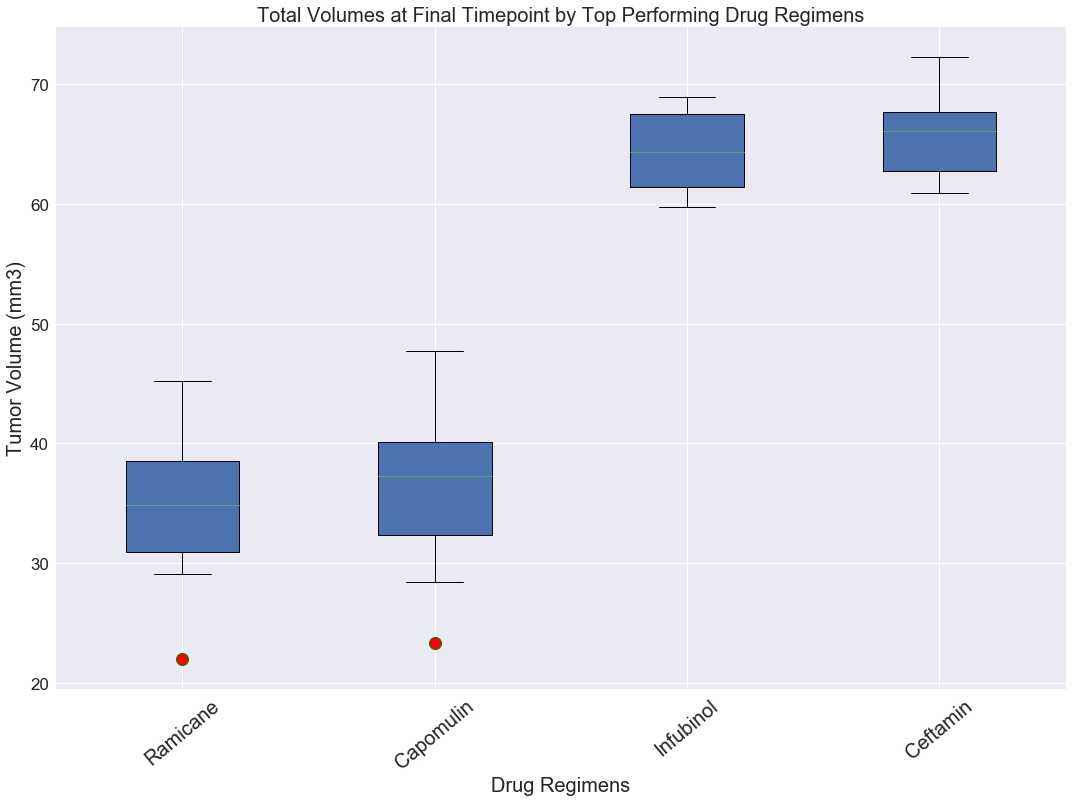

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(15, 10))
boxplot_data = [Ramicane_array, Capomulin_array, Ceftamin_array, Infubinol_array]

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(boxplot_data, meanline=True, patch_artist=True, whis=1.0, showfliers=True, flierprops=flierprops)

plt.title('Total Volumes at Final Timepoint by Top Performing Drug Regimens', fontsize=20)
plt.ylabel('Tumor Volume (mm3)', fontsize=20)
plt.yticks(fontsize=17)
plt.tight_layout()

plt.xlabel('Drug Regimens', fontsize=20)
ticks=np.arange(len(Top_Drug_Regimens))
plt.xticks(1 + ticks, Top_Drug_Regimens, rotation=40 , fontsize=20)
plt.show()

## Line and Scatter Plots

In [47]:
Capomulin_sample = filterA.loc[filterA["Mouse ID"]=='s185', :]
line_yaxis = Capomulin_sample["Tumor Volume (mm3)"].values
line_yaxis

array([45.        , 43.87849569, 37.61494768, 38.17723195, 36.86687576,
       33.94994037, 32.95967078, 28.32853059, 25.47214326, 23.34359787])

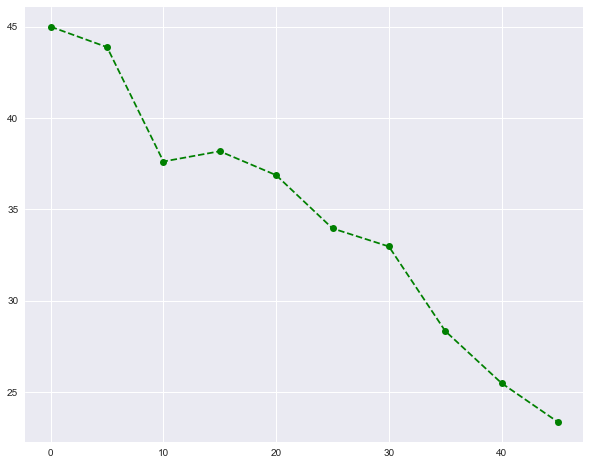

In [48]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.figure(figsize=(10,8))
line_xaxis = np.arange(start=0, stop=50, step=5)
line_xaxis

plt.plot(line_xaxis, line_yaxis, "go--")
plt.show()

In [49]:
Capomulin_samp_weight = bestDR_byTVols.loc[bestDR_byTVols["Drug Regimen"]=='Capomulin', :]
Capomulin_samp_weight

Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)  Weight (g)
10      Capomulin     s185          0           45.000000          17
11      Capomulin     s185          5           43.878496          17
12      Capomulin     s185         10           37.614948          17
13      Capomulin     s185         15           38.177232          17
14      Capomulin     s185         20           36.866876          17
...           ...      ...        ...                 ...         ...
440     Capomulin     i557         45           47.685963          24
1452    Capomulin     r157          0           45.000000          25
1453    Capomulin     r157          5           45.597064          25
1454    Capomulin     r157         10           46.059608          25
1455    Capomulin     r157         15           46.539206          25

[230 rows x 5 columns]

In [50]:
final_time.loc[final_time["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)"]]

Mouse ID  Weight (g)
19      s185          17
29      x401          15
39      m601          17
104     u364          17
124     y793          17
134     r554          17
144     m957          19
164     t565          17
204     i738          20
224     w914          21
244     g288          19
282     l897          19
299     b742          21
309     b128          22
337     j119          23
350     v923          21
360     g316          22
370     s710          23
380     l509          21
390     r944          25
440     i557          24

In [54]:
#y-axis for scatter plot
Cap_TVols_splot = Capomulin_samp_weight.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()
avg_Cap_Vols = Cap_TVols_splot.values
avg_Cap_Vols

array([41.96363563, 40.0836993 , 36.50597276, 41.99009661, 44.6133439 ,
       44.80580968, 39.14105275, 44.46523635, 43.21692461, 44.43447379,
       42.50726104, 34.8474699 , 39.04981645, 45.79896951, 36.50921205,
       43.36736445, 34.55914339, 42.80373304, 39.3287251 , 39.88749519,
       41.5815951 , 41.38482521, 41.35245228, 36.18203956, 38.50682925])

In [55]:
Cap_weight_splot = Capomulin_samp_weight.groupby(["Mouse ID"])['Weight (g)'].mean()
avg_Cap_weight = Cap_weight_splot.values
avg_Cap_weight

array([22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17,
       23, 17, 17, 21, 23, 21, 15, 17], dtype=int64)

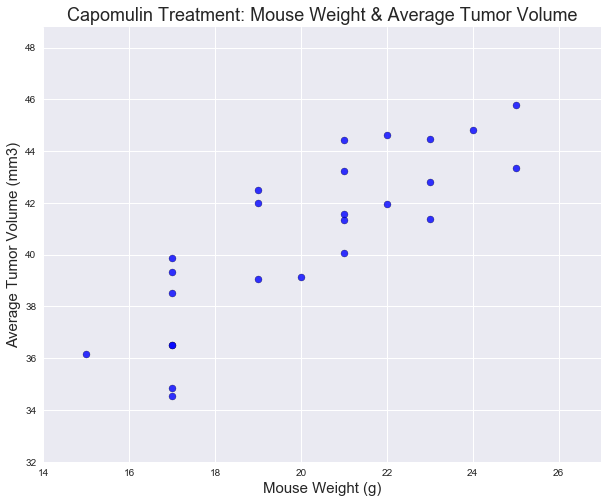

In [79]:
# Generate a scatter plot of mouse weight versus AVERAGE tumor volume for the Capomulin regimen

plt.figure(figsize=(10,8))


#y-axis=avg tumor volume
plt.scatter(
    avg_Cap_weight, 
    avg_Cap_Vols, 
    marker="o", 
    facecolors="blue", 
    edgecolors="black",
    alpha=0.8
)
plt.title('Capomulin Treatment: Mouse Weight & Average Tumor Volume', fontsize=18)
plt.xlabel('Mouse Weight (g)', fontsize=15)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=15)

plt.ylim(32,max(avg_Cap_Vols)+3)
plt.xlim(14,max(avg_Cap_weight)+2)
plt.show()


## Correlation and Regression

y = 0.95 x +  21.55


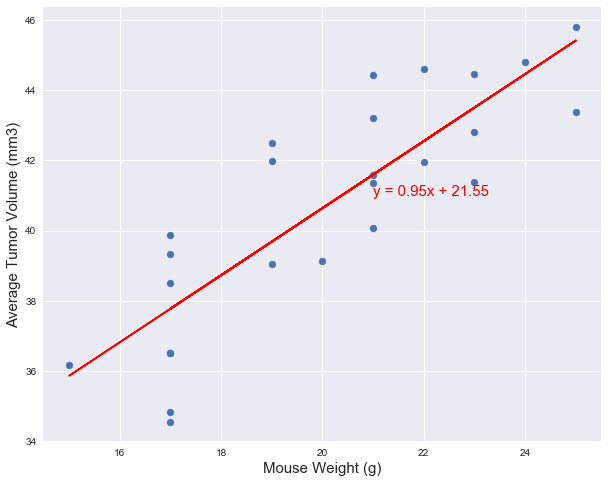

In [87]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

plt.figure(figsize=(10,8))

#x-values
avg_Cap_weight
#y-values
avg_Cap_Vols

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_Cap_weight, avg_Cap_Vols)   

# Get x/y values for linear regression linear
regress_values = avg_Cap_weight * slope + intercept                                        
print(f"y = {(round(slope,2))} x +  {(round(intercept,2))}")
plt.scatter(avg_Cap_weight,avg_Cap_Vols)

 # Add linear regression line to plot
plt.plot(avg_Cap_weight,regress_values,"r-")                                              
plt.annotate(line_eq,(21,41),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)', fontsize=15)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=15)
plt.show()